In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from modelbase.ode import Model, LabelModel, Simulator

Could not find GLIMDA.


In [2]:
import pandas as pd


def get_nonzero_y0(y0):
    return pd.Series(
        {k: v for k, v in y0.items() if v > 0}
    ).sort_index()


def get_nonzero_fcd(model, y):
    return pd.Series(
        {
            k: v
            for k, v in model.get_full_concentration_dict(
                y=y, t=0
            ).items()
            if v != 0
        }
    ).sort_index()


def get_nonzero_fluxes(model, y):
    return pd.Series(
        {
            k: v
            for k, v in model.get_fluxes_dict(y=y, t=0).items()
            if v != 0
        }
    ).sort_index()


def get_nonzero_rhs(model, y):
    return pd.Series(
        {
            k: v
            for k, v in model.get_right_hand_side(
                y=y, t=0
            ).items()
            if v != 0
        }
    ).sort_index()

# Definitions

In [3]:
labelmaps = {
    "v1": [2, 1, 0, 5, 3, 4],
    "v2": [0, 1, 2],
    "v3": [0, 1, 2],
    "v4": [2, 1, 0],
    "v5": [0, 1, 2, 3, 4, 5],
    "v6": [0, 1, 2, 3, 4, 5],
    "v7": [0, 1, 6, 7, 8, 2, 3, 4, 5],
    "v7r": [0, 1, 5, 6, 7, 8, 2, 3, 4],
    "v8": [0, 1, 2, 3, 4, 5, 6],
    "v9": [0, 1, 2, 3, 4, 5, 6],
    "v10": [0, 1, 7, 8, 9, 2, 3, 4, 5, 6],
    "v10r": [0, 1, 5, 6, 7, 8, 9, 2, 3, 4],
    "v11": [0, 1, 2, 3, 4],
    "v12": [0, 1, 2, 3, 4],
    "v13": [0, 1, 2, 3, 4],
    "v14": [0, 1, 2, 3, 4, 5],
    "v15": [0, 1, 2, 3, 4, 5],
    "v16": None,
    "vSt": [0, 1, 2, 3, 4, 5],
    "vPGA_out": [0, 1, 2],
    "vGAP_out": [0, 1, 2],
    "vDHAP_out": [0, 1, 2],
}

In [4]:
parameters = {
    "Vmax_1": 2.72,  # [mM/s], Pettersson 1988
    "Vmax_6": 1.6,  # [mM/s], Pettersson 1988
    "Vmax_9": 0.32,  # [mM/s], Pettersson 1988
    "Vmax_13": 8.0,  # [mM/s], Pettersson 1988
    "Vmax_16": 2.8,  # [mM/s], Pettersson 1988
    "Vmax_starch": 0.32,  # [mM/s], Pettersson 1988
    "Vmax_efflux": 2.0,  # [mM/s], Pettersson 1988
    "Km_1": 0.02,  # [mM], Pettersson 1988
    "Km_6": 0.03,  # [mM], Pettersson 1988
    "Km_9": 0.013,  # [mM], Pettersson 1988
    "Km_13_1": 0.05,  # [mM], Pettersson 1988
    "Km_13_2": 0.05,  # [mM], Pettersson 1988
    "Km_16_1": 0.014,  # [mM], Pettersson 1988
    "Km_16_2": 0.3,  # [mM], Pettersson 1988
    "Km_starch_1": 0.08,  # [mM], Pettersson 1988
    "Km_starch_2": 0.08,  # [mM], Pettersson 1988
    "K_pga": 0.25,  # [mM], Pettersson 1988
    "K_gap": 0.075,  # [mM], Pettersson 1988
    "K_dhap": 0.077,  # [mM], Pettersson 1988
    "K_pi": 0.63,  # [mM], Pettersson 1988
    "K_pxt": 0.74,  # [mM], Pettersson 1988
    "Ki_1_1": 0.04,  # [mM], Pettersson 1988
    "Ki_1_2": 0.04,  # [mM], Pettersson 1988
    "Ki_1_3": 0.075,  # [mM], Pettersson 1988
    "Ki_1_4": 0.9,  # [mM], Pettersson 1988
    "Ki_1_5": 0.07,  # [mM], Pettersson 1988
    "Ki_6_1": 0.7,  # [mM], Pettersson 1988
    "Ki_6_2": 12.0,  # [mM], Pettersson 1988
    "Ki_9": 12.0,  # [mM], Pettersson 1988
    "Ki_13_1": 2.0,  # [mM], Pettersson 1988
    "Ki_13_2": 0.7,  # [mM], Pettersson 1988
    "Ki_13_3": 4.0,  # [mM], Pettersson 1988
    "Ki_13_4": 2.5,  # [mM], Pettersson 1988
    "Ki_13_5": 0.4,  # [mM], Pettersson 1988
    "Ki_starch": 10.0,  # [mM], Pettersson 1988
    "Ka_starch_1": 0.1,  # [mM], Pettersson 1988
    "Ka_starch_2": 0.02,  # [mM], Pettersson 1988
    "Ka_starch_3": 0.02,  # [mM], Pettersson 1988
    "k_rapid_eq": 800000000.0,  # Rapid Equilibrium speed
    "q2": 0.00031,  # [], Pettersson 1988
    "q3": 16000000.0,  # [], Pettersson 1988
    "q4": 22.0,  # [], Pettersson 1988
    "q5": 7.1,  # [1/mM]], Pettersson 1988
    "q7": 0.084,  # [], Pettersson 1988
    "q8": 13.0,  # [1/mM]], Pettersson 1988
    "q10": 0.85,  # [], Pettersson 1988
    "q11": 0.4,  # [], Pettersson 1988
    "q12": 0.67,  # [], Pettersson 1988
    "q14": 2.3,  # [], Pettersson 1988
    "q15": 0.058,  # [], Pettersson 1988
    "CO2": 0.2,  # [mM], Pettersson 1988
    "Phosphate_total": 15.0,  # [mM], Pettersson 1988
    "P_pool_ext": 0.5,  # [mM], Pettersson 1988
    "AP_total": 0.5,  # [mM], Pettersson 1988
    "N_total": 0.5,  # [mM], Pettersson 1988
    "pH_medium": 7.6,  # [], Pettersson 1988
    "pH_stroma": 7.9,  # [], Pettersson 1988
    "proton_pool_stroma": 1.2589254117941661e-05,  # [mM], Pettersson 1988
    "NADPH_pool": 0.21,  # [mM], Pettersson 1988
    "NADP_pool": 0.29,  # [mM], Pettersson 1988
}

poolman_base_y0 = {
    "PGA": 0.6437280277346407,
    "BPGA": 0.001360476366780556,
    "GAP": 0.011274125311289358,
    "DHAP": 0.24803073890728228,
    "FBP": 0.019853938009873073,
    "F6P": 1.0950701164493861,
    "E4P": 0.028511831060903877,
    "G6P": 2.5186612678035734,
    "G1P": 0.14608235353185037,
    "SBP": 0.09193353265673603,
    "S7P": 0.23124426886012006,
    "X5P": 0.036372985623662736,
    "R5P": 0.06092475016463224,
    "RUBP": 0.24993009253928708,
    "RU5P": 0.02436989993734177,
    "ATP": 0.43604115800259613,
}

## Rate functions

In [5]:
def ADP(ATP, AP_total):
    return [AP_total - ATP]


def P_i(
    PGA,
    BPGA,
    GAP,
    DHAP,
    FBP,
    F6P,
    G6P,
    G1P,
    SBP,
    S7P,
    E4P,
    X5P,
    R5P,
    RUBP,
    RU5P,
    ATP,
    phosphate_total,
):
    return [
        phosphate_total
        - (
            PGA
            + 2 * BPGA
            + GAP
            + DHAP
            + 2 * FBP
            + F6P
            + G6P
            + G1P
            + 2 * SBP
            + S7P
            + E4P
            + X5P
            + R5P
            + 2 * RUBP
            + RU5P
            + ATP
        )
    ]


def N(
    P_pool, PGA, GAP, DHAP, Kpxt, Pext, Kpi, Kpga, Kgap, Kdhap,
):
    return [
        (
            1
            + (1 + (Kpxt / Pext))
            * (
                (P_pool / Kpi)
                + (PGA / Kpga)
                + (GAP / Kgap)
                + (DHAP / Kdhap)
            )
        )
    ]

In [6]:
def v1(
    RUBP,
    PGA,
    FBP,
    SBP,
    P_pool,
    V1,
    Km1,
    Ki11,
    Ki12,
    Ki13,
    Ki14,
    Ki15,
    NADPH_pool,
):
    return (V1 * RUBP) / (
        RUBP
        + Km1
        * (
            1
            + (PGA / Ki11)
            + (FBP / Ki12)
            + (SBP / Ki13)
            + (P_pool / Ki14)
            + (NADPH_pool / Ki15)
        )
    )


def v1_label(
    RUBP,
    RUBP_total,
    PGA_total,
    FBP_total,
    SBP_total,
    P_pool,
    V1,
    Km1,
    Ki11,
    Ki12,
    Ki13,
    Ki14,
    Ki15,
    NADPH_pool,
):
    return (V1 * RUBP) / (
        RUBP_total
        + Km1
        * (
            1
            + (PGA_total / Ki11)
            + (FBP_total / Ki12)
            + (SBP_total / Ki13)
            + (P_pool / Ki14)
            + (NADPH_pool / Ki15)
        )
    )


def v6(FBP, F6P, P, V6, Km6, Ki61, Ki62):
    return (V6 * FBP) / (
        FBP + Km6 * (1 + (F6P / Ki61) + (P / Ki62))
    )


def v6_label(FBP, FBP_total, F6P_total, P, V6, Km6, Ki61, Ki62):
    return (V6 * FBP) / (
        FBP_total + Km6 * (1 + (F6P_total / Ki61) + (P / Ki62))
    )


def v9(SBP, P, V9, Km9, Ki9):
    return (V9 * SBP) / (SBP + Km9 * (1 + (P / Ki9)))


def v9_label(SBP, SBP_total, P, V9, Km9, Ki9):
    return (V9 * SBP) / (SBP_total + Km9 * (1 + (P / Ki9)))


def v13(
    RU5P,
    ATP,
    PGA,
    RUBP,
    ADP,
    P_pool,
    V13,
    Km131,
    Km132,
    Ki131,
    Ki132,
    Ki133,
    Ki134,
    Ki135,
):
    return (V13 * RU5P * ATP) / (
        (
            RU5P
            + Km131
            * (
                1
                + (PGA / Ki131)
                + (RUBP / Ki132)
                + (P_pool / Ki133)
            )
        )
        * (
            ATP * (1 + (ADP / Ki134))
            + Km132 * (1 + (ADP / Ki135))
        )
    )


def v13_label(
    RU5P,
    ATP,
    RU5P_total,
    PGA_total,
    RUBP_total,
    ADP,
    P_pool,
    V13,
    Km131,
    Km132,
    Ki131,
    Ki132,
    Ki133,
    Ki134,
    Ki135,
):
    return (V13 * RU5P * ATP) / (
        (
            RU5P_total
            + Km131
            * (
                1
                + (PGA_total / Ki131)
                + (RUBP_total / Ki132)
                + (P_pool / Ki133)
            )
        )
        * (
            ATP * (1 + (ADP / Ki134))
            + Km132 * (1 + (ADP / Ki135))
        )
    )


def vStarchProduction(
    G1P,
    ATP,
    PGA,
    F6P,
    FBP,
    ADP,
    P_pool,
    Vst,
    Kmst1,
    Kmst2,
    Kist,
    Kast1,
    Kast2,
    Kast3,
):
    return (Vst * G1P * ATP) / (
        (G1P + Kmst1)
        * (
            (1 + (ADP / Kist)) * (ATP + Kmst2)
            + (
                (Kmst2 * P_pool)
                / (Kast1 * PGA + Kast2 * F6P + Kast3 * FBP)
            )
        )
    )


def vStarchProduction_label(
    G1P,
    ATP,
    G1P_total,
    PGA_total,
    F6P_total,
    FBP_total,
    ADP,
    P_pool,
    Vst,
    Kmst1,
    Kmst2,
    Kist,
    Kast1,
    Kast2,
    Kast3,
):
    return (Vst * G1P * ATP) / (
        (G1P_total + Kmst1)
        * (
            (1 + (ADP / Kist)) * (ATP + Kmst2)
            + (
                (Kmst2 * P_pool)
                / (
                    Kast1 * PGA_total
                    + Kast2 * F6P_total
                    + Kast3 * FBP_total
                )
            )
        )
    )


def v_out(s1, N_total, VMax_efflux, K_efflux):
    return (VMax_efflux * s1) / (N_total * K_efflux)

In [7]:
def v2f(PGA, ATP, k2f):
    return k2f * (ATP * PGA)


def v2r(BPGA, ADP, k2r, q2):
    return k2r * (ADP * BPGA) / (q2)


def v3f(BPGA, k3f, NADPH_pool, proton_pool_stroma):
    return k3f * NADPH_pool * BPGA * proton_pool_stroma


def v3r(GAP, P_i, k3r, q3, NADP_pool):
    return k3r * GAP * NADP_pool * P_i / (q3)


def v4f(GAP, k4f):
    return k4f * GAP


def v4r(DHAP, k4r, q4):
    return k4r * DHAP / (q4)


def v5f(DHAP, GAP, k5f):
    return k5f * GAP * DHAP


def v5r(FBP, k5r, q5):
    return k5r * FBP / (q5)


def v7f(F6P, GAP, k7f):
    return k7f * GAP * F6P


def v7r(X5P, E4P, k7r, q7):
    return k7r * X5P * E4P / (q7)


def v8f(DHAP, E4P, k8f):
    return k8f * DHAP * E4P


def v8r(SBP, k8r, q8):
    return k8r * SBP / (q8)


def v10f(S7P, GAP, k10f):
    return k10f * GAP * S7P


def v10r(X5P, R5P, k10r, q10):
    return k10r * X5P * R5P / (q10)


def v11f(R5P, k11f):
    return k11f * R5P


def v11r(RU5P, k11r, q11):
    return k11r * RU5P / (q11)


def v12f(X5P, k12f):
    return k12f * X5P


def v12r(RU5P, k12r, q12):
    return k12r * RU5P / (q12)


def v14f(F6P, k14f):
    return k14f * F6P


def v14r(G6P, k14r, q14):
    return k14r * G6P / q14


def v15f(G6P, k15f):
    return k15f * G6P


def v15r(G1P, k15r, q15):
    return k15r * G1P / (q15)

In [8]:
def rapid_equilibrium_1_1(s1, p1, kRE, q):
    return kRE * (s1 - p1 / q)


def rapid_equilibrium_2_1(s1, s2, p1, kRE, q):
    return kRE * (s1 * s2 - p1 / q)


def rapid_equilibrium_2_2(s1, s2, p1, p2, kRE, q):
    return kRE * (s1 * s2 - (p1 * p2) / q)


def rev_mass_action_1_1(s1, p1, kf, kr):
    return kf * s1 - kr * p1


def rev_mass_action_2_1(s1, s2, p1, kf, kr):
    return kf * s1 * s2 - kr * p1


def rev_mass_action_2_2(s1, s2, p1, p2, kf, kr):
    return kf * s1 * s2 - kr * p1 * p2


def v_out(s1, N_total, VMax_efflux, K_efflux):
    return (VMax_efflux * s1) / (N_total * K_efflux)


def v3(
    BPGA,
    GAP,
    P_pool,
    proton_pool_stroma,
    NADPH_pool,
    NADP_pool,
    kRE,
    q3,
):
    return kRE * (
        (NADPH_pool * BPGA * proton_pool_stroma)
        - (GAP * NADP_pool * P_pool / q3)
    )


def v3_mass_action(
    BPGA,
    GAP,
    phosphate_pool,
    proton_pool_stroma,
    NADPH_pool,
    NADP_pool,
    kf,
    kr,
):
    return (
        kf * NADPH_pool * BPGA * proton_pool_stroma
        - kr * GAP * NADP_pool * phosphate_pool
    )


def v16(ADP, Phosphate_i, V16, Km161, Km162):
    return (V16 * ADP * Phosphate_i) / (
        (ADP + Km161) * (Phosphate_i + Km162)
    )

# Poolman model

## Base Model

In [9]:
m_poolman_base = Model(parameters=parameters)
m_poolman_base.add_compound("ATP")
m_poolman_base.add_compounds(
    [
        "PGA",
        "BPGA",
        "GAP",
        "DHAP",
        "FBP",
        "F6P",
        "E4P",
        "G6P",
        "G1P",
        "SBP",
        "S7P",
        "X5P",
        "R5P",
        "RU5P",
        "RUBP",
    ]
)

### Algebraic modules

In [10]:
# Algebraic modules
m_poolman_base.add_algebraic_module(
    module_name="ADP_mod",
    function=ADP,
    compounds=["ATP"],
    derived_compounds=["ADP"],
    parameters=["AP_total"],
)
m_poolman_base.add_algebraic_module(
    module_name="Pi_mod",
    function=P_i,
    compounds=[
        "PGA",
        "BPGA",
        "GAP",
        "DHAP",
        "FBP",
        "F6P",
        "G6P",
        "G1P",
        "SBP",
        "S7P",
        "E4P",
        "X5P",
        "R5P",
        "RUBP",
        "RU5P",
        "ATP",
    ],
    derived_compounds=["P_pool"],
    parameters=["Phosphate_total"],
)
m_poolman_base.add_algebraic_module(
    module_name="N_mod",
    function=N,
    compounds=["P_pool", "PGA", "GAP", "DHAP",],
    derived_compounds=["N_pool"],
    parameters=[
        "K_pxt",
        "P_pool_ext",
        "K_pi",
        "K_pga",
        "K_gap",
        "K_dhap",
    ],
)

### Rapid equilibrium reactions

In [11]:
m_poolman_base.add_reaction(
    rate_name="v2",
    function=rapid_equilibrium_2_2,
    stoichiometry={"PGA": -1, "ATP": -1, "BPGA": 1},
    modifiers=["ADP"],
    parameters=["k_rapid_eq", "q2"],
    reversible=True,
)
m_poolman_base.add_reaction(
    rate_name="v3",
    function=v3,
    stoichiometry={"BPGA": -1, "GAP": 1},
    modifiers=["P_pool"],
    parameters=[
        "proton_pool_stroma",
        "NADPH_pool",
        "NADP_pool",
        "k_rapid_eq",
        "q3",
    ],
    reversible=True,
)
m_poolman_base.add_reaction(
    rate_name="v4",
    function=rapid_equilibrium_1_1,
    stoichiometry={"GAP": -1, "DHAP": 1},
    parameters=["k_rapid_eq", "q4"],
    reversible=True,
)
m_poolman_base.add_reaction(
    rate_name="v5",
    function=rapid_equilibrium_2_1,
    stoichiometry={"DHAP": -1, "GAP": -1, "FBP": 1},
    parameters=["k_rapid_eq", "q5"],
    reversible=True,
)
m_poolman_base.add_reaction(
    rate_name="v7",
    function=rapid_equilibrium_2_2,
    stoichiometry={"F6P": -1, "GAP": -1, "X5P": 1, "E4P": 1},
    parameters=["k_rapid_eq", "q7"],
    reversible=True,
)
m_poolman_base.add_reaction(
    rate_name="v8",
    function=rapid_equilibrium_2_1,
    stoichiometry={"DHAP": -1, "E4P": -1, "SBP": 1},
    parameters=["k_rapid_eq", "q8"],
    reversible=True,
)
m_poolman_base.add_reaction(
    rate_name="v10",
    function=rapid_equilibrium_2_2,
    stoichiometry={"S7P": -1, "GAP": -1, "X5P": 1, "R5P": 1},
    parameters=["k_rapid_eq", "q10"],
    reversible=True,
)
m_poolman_base.add_reaction(
    rate_name="v11",
    function=rapid_equilibrium_1_1,
    stoichiometry={"R5P": -1, "RU5P": 1},
    parameters=["k_rapid_eq", "q11"],
    reversible=True,
)
m_poolman_base.add_reaction(
    rate_name="v12",
    function=rapid_equilibrium_1_1,
    stoichiometry={"X5P": -1, "RU5P": 1},
    parameters=["k_rapid_eq", "q12"],
    reversible=True,
)
m_poolman_base.add_reaction(
    rate_name="v14",
    function=rapid_equilibrium_1_1,
    stoichiometry={"F6P": -1, "G6P": 1},
    parameters=["k_rapid_eq", "q14"],
    reversible=True,
)
m_poolman_base.add_reaction(
    rate_name="v15",
    function=rapid_equilibrium_1_1,
    stoichiometry={"G6P": -1, "G1P": 1},
    parameters=["k_rapid_eq", "q15"],
    reversible=True,
)

### Reactions

In [12]:
m_poolman_base.add_reaction(
    rate_name="v16",
    function=v16,
    stoichiometry={"ATP": 1},
    modifiers=["ADP", "P_pool"],
    parameters=["Vmax_16", "Km_16_1", "Km_16_2"],
)

m_poolman_base.add_reaction(
    rate_name="v1",
    function=v1,
    stoichiometry={"RUBP": -1, "PGA": 2},
    modifiers=["PGA", "FBP", "SBP", "P_pool",],
    parameters=[
        "Vmax_1",
        "Km_1",
        "Ki_1_1",
        "Ki_1_2",
        "Ki_1_3",
        "Ki_1_4",
        "Ki_1_5",
        "NADPH_pool",
    ],
)

m_poolman_base.add_reaction(
    rate_name="v6",
    function=v6,
    stoichiometry={"FBP": -1, "F6P": 1},
    modifiers=["F6P", "P_pool"],
    parameters=["Vmax_6", "Km_6", "Ki_6_1", "Ki_6_2"],
)

m_poolman_base.add_reaction(
    rate_name="v9",
    function=v9,
    stoichiometry={"SBP": -1, "S7P": 1},
    modifiers=["P_pool"],
    parameters=["Vmax_9", "Km_9", "Ki_9"],
)

m_poolman_base.add_reaction(
    rate_name="v13",
    function=v13,
    stoichiometry={"RU5P": -1, "ATP": -1, "RUBP": 1},
    modifiers=["PGA", "RUBP", "ADP", "P_pool",],
    parameters=[
        "Vmax_13",
        "Km_13_1",
        "Km_13_2",
        "Ki_13_1",
        "Ki_13_2",
        "Ki_13_3",
        "Ki_13_4",
        "Ki_13_5",
    ],
)

m_poolman_base.add_reaction(
    rate_name="vSt",
    function=vStarchProduction,
    stoichiometry={"G1P": -1, "ATP": -1},
    modifiers=["PGA", "F6P", "FBP", "ADP", "P_pool"],
    parameters=[
        "Vmax_starch",
        "Km_starch_1",
        "Km_starch_2",
        "Ki_starch",
        "Ka_starch_1",
        "Ka_starch_2",
        "Ka_starch_3",
    ],
)

m_poolman_base.add_reaction(
    rate_name="vPGA_out",
    function=v_out,
    stoichiometry={"PGA": -1},
    modifiers=["N_pool"],
    parameters=["Vmax_efflux", "K_pga"],
)
m_poolman_base.add_reaction(
    rate_name="vGAP_out",
    function=v_out,
    stoichiometry={"GAP": -1},
    modifiers=["N_pool"],
    parameters=["Vmax_efflux", "K_gap"],
)
m_poolman_base.add_reaction(
    rate_name="vDHAP_out",
    function=v_out,
    stoichiometry={"DHAP": -1},
    modifiers=["N_pool"],
    parameters=["Vmax_efflux", "K_dhap"],
)

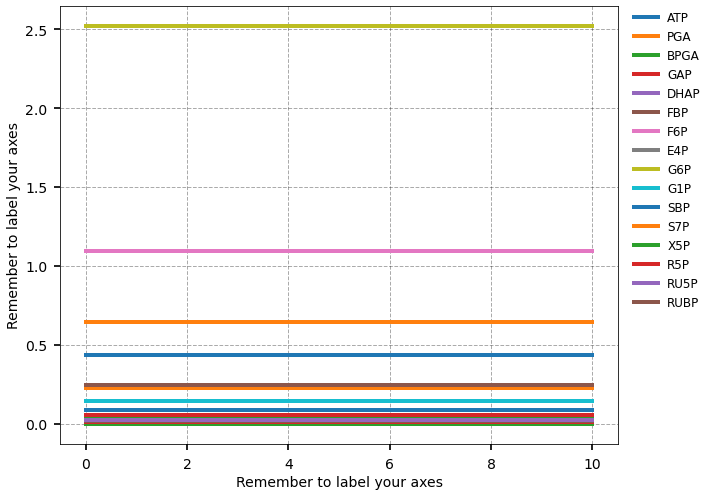

In [13]:
s_poolman_base = Simulator(m_poolman_base)
s_poolman_base.initialise(poolman_base_y0)
t, y = s_poolman_base.simulate(10)
fig, ax = s_poolman_base.plot()

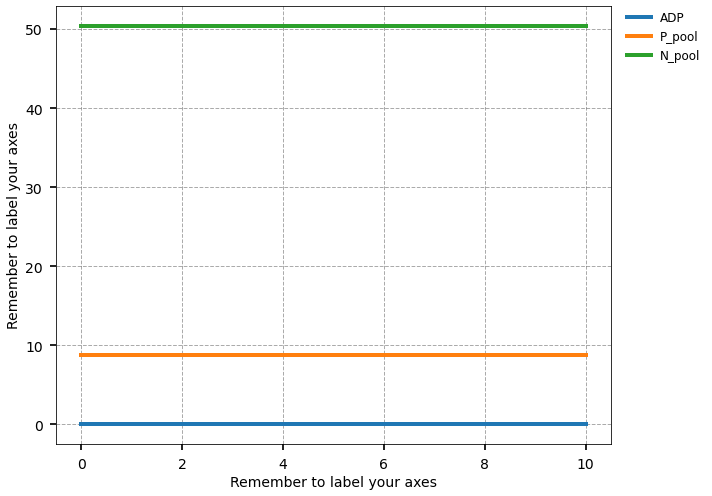

In [14]:
fig, ax = s_poolman_base.plot_derived()
plt.show()

## Split label model

In [15]:
m_poolman_split = LabelModel(parameters=parameters)
m_poolman_split.add_parameters(
    {
        "k2f": 8e8,
        "k2r": 8e8,
        "k3f": 8e8,
        "k3r": 8e8,
        "k4f": 8e8,
        "k4r": 8e8,
        "k5f": 8e8,
        "k5r": 8e8,
        "k7f": 8e8,
        "k7r": 8e8,
        "k8f": 8e8,
        "k8r": 8e8,
        "k10f": 8e8,
        "k10r": 8e8,
        "k11f": 8e8,
        "k11r": 8e8,
        "k12f": 8e8,
        "k12r": 8e8,
        "k14f": 8e8,
        "k14r": 8e8,
        "k15f": 8e8,
        "k15r": 8e8,
    }
)
m_poolman_split.add_compound("ATP")
m_poolman_split.add_label_compounds(
    {
        "PGA": 3,
        "BPGA": 3,
        "GAP": 3,
        "DHAP": 3,
        "FBP": 6,
        "F6P": 6,
        "E4P": 4,
        "G6P": 6,
        "G1P": 6,
        "SBP": 7,
        "S7P": 7,
        "X5P": 5,
        "R5P": 5,
        "RU5P": 5,
        "RUBP": 5,
    }
)

### Algebraic modules

In [16]:
m_poolman_split.add_algebraic_module(
    module_name="ADP_module",
    function=ADP,
    compounds=["ATP"],
    derived_compounds=["ADP"],
    parameters=["AP_total"],
)


m_poolman_split.add_algebraic_module(
    module_name="Phosphate_module",
    function=P_i,
    compounds=[
        "PGA__total",
        "BPGA__total",
        "GAP__total",
        "DHAP__total",
        "FBP__total",
        "F6P__total",
        "G6P__total",
        "G1P__total",
        "SBP__total",
        "S7P__total",
        "E4P__total",
        "X5P__total",
        "R5P__total",
        "RUBP__total",
        "RU5P__total",
        "ATP",
    ],
    derived_compounds=["P_pool"],
    parameters=["Phosphate_total"],
)


m_poolman_split.add_algebraic_module(
    module_name="N_module",
    function=N,
    compounds=["P_pool", "PGA__total", "GAP__total", "DHAP__total"],
    derived_compounds=["N_pool"],
    parameters=[
        "K_pxt",
        "P_pool_ext",
        "K_pi",
        "K_pga",
        "K_gap",
        "K_dhap",
    ],
)

### Rapid equilibrium reactions

In [17]:
m_poolman_split.add_labelmap_reaction(
    "v2f",
    function=v2f,
    labelmap=labelmaps["v2"],
    stoichiometry={"PGA": -1, "ATP": -1, "BPGA": 1},
    parameters=["k2f"],
)


m_poolman_split.add_labelmap_reaction(
    "v2r",
    function=v2r,
    labelmap=labelmaps["v2"],
    stoichiometry={"BPGA": -1, "PGA": 1, "ATP": 1},
    modifiers=["ADP"],
    parameters=["k2r", "q2"],
)


m_poolman_split.add_labelmap_reaction(
    "v3f",
    function=v3f,
    labelmap=labelmaps["v3"],
    stoichiometry={"BPGA": -1, "GAP": 1},
    parameters=["k3f", "NADPH_pool", "proton_pool_stroma"],
)


m_poolman_split.add_labelmap_reaction(
    "v3r",
    function=v3r,
    labelmap=labelmaps["v3"],
    stoichiometry={"GAP": -1, "BPGA": 1},
    modifiers=["P_pool"],
    parameters=["k3r", "q3", "NADP_pool",],
)


m_poolman_split.add_labelmap_reaction(
    "v4f",
    function=v4f,
    labelmap=labelmaps["v4"],
    stoichiometry={"GAP": -1, "DHAP": 1},
    parameters=["k4f"],
)


m_poolman_split.add_labelmap_reaction(
    "v4r",
    function=v4r,
    labelmap=labelmaps["v4"],
    stoichiometry={"DHAP": -1, "GAP": 1},
    parameters=["k4r", "q4"],
)


m_poolman_split.add_labelmap_reaction(
    "v5f",
    function=v5f,
    labelmap=labelmaps["v5"],
    stoichiometry={"DHAP": -1, "GAP": -1, "FBP": 1},
    parameters=["k5f"],
)


m_poolman_split.add_labelmap_reaction(
    "v5r",
    function=v5r,
    labelmap=labelmaps["v5"],
    stoichiometry={"FBP": -1, "DHAP": 1, "GAP": 1},
    parameters=["k5r", "q5"],
)


m_poolman_split.add_labelmap_reaction(
    "v7f",
    function=v7f,
    labelmap=labelmaps["v7"],
    stoichiometry={"F6P": -1, "GAP": -1, "X5P": 1, "E4P": 1},
    parameters=["k7f"],
)


m_poolman_split.add_labelmap_reaction(
    "v7r",
    function=v7r,
    labelmap=labelmaps["v7r"],
    stoichiometry={"X5P": -1, "E4P": -1, "F6P": 1, "GAP": 1},
    parameters=["k7r", "q7"],
)


m_poolman_split.add_labelmap_reaction(
    "v8f",
    function=v8f,
    labelmap=labelmaps["v8"],
    stoichiometry={"DHAP": -1, "E4P": -1, "SBP": 1},
    parameters=["k8f"],
)


m_poolman_split.add_labelmap_reaction(
    "v8r",
    function=v8r,
    labelmap=labelmaps["v8"],
    stoichiometry={"SBP": -1, "DHAP": 1, "E4P": 1},
    parameters=["k8r", "q8"],
)


m_poolman_split.add_labelmap_reaction(
    "v10f",
    function=v10f,
    labelmap=labelmaps["v10"],
    stoichiometry={"S7P": -1, "GAP": -1, "X5P": 1, "R5P": 1},
    parameters=["k10f"],
)


m_poolman_split.add_labelmap_reaction(
    "v10r",
    function=v10r,
    labelmap=labelmaps["v10r"],
    stoichiometry={"X5P": -1, "R5P": -1, "S7P": 1, "GAP": 1},
    parameters=["k10r", "q10"],
)


m_poolman_split.add_labelmap_reaction(
    "v11f",
    function=v11f,
    labelmap=labelmaps["v11"],
    stoichiometry={"R5P": -1, "RU5P": 1},
    parameters=["k11f"],
)


m_poolman_split.add_labelmap_reaction(
    "v11r",
    function=v11r,
    labelmap=labelmaps["v11"],
    stoichiometry={"RU5P": -1, "R5P": 1},
    parameters=["k11r", "q11"],
)


m_poolman_split.add_labelmap_reaction(
    "v12f",
    function=v12f,
    labelmap=labelmaps["v12"],
    stoichiometry={"X5P": -1, "RU5P": 1},
    parameters=["k12f"],
)


m_poolman_split.add_labelmap_reaction(
    "v12r",
    function=v12r,
    labelmap=labelmaps["v12"],
    stoichiometry={"RU5P": -1, "X5P": 1},
    parameters=["k12r", "q12"],
)


m_poolman_split.add_labelmap_reaction(
    "v14f",
    function=v14f,
    labelmap=labelmaps["v14"],
    stoichiometry={"F6P": -1, "G6P": 1},
    parameters=["k14f"],
)


m_poolman_split.add_labelmap_reaction(
    "v14r",
    function=v14r,
    labelmap=labelmaps["v14"],
    stoichiometry={"G6P": -1, "F6P": 1},
    parameters=["k14r", "q14"],
)


m_poolman_split.add_labelmap_reaction(
    "v15f",
    function=v15f,
    labelmap=labelmaps["v15"],
    stoichiometry={"G6P": -1, "G1P": 1},
    parameters=["k15f"],
)


m_poolman_split.add_labelmap_reaction(
    "v15r",
    function=v15r,
    labelmap=labelmaps["v15"],
    stoichiometry={"G1P": -1, "G6P": 1},
    parameters=["k15r", "q15"],
)

### Reactions

In [18]:
m_poolman_split.add_labelmap_reaction(
    rate_name="v1",
    function=v1_label,
    stoichiometry={"RUBP": -1, "PGA": 2},
    labelmap=labelmaps["v1"],
    modifiers=[
        "RUBP__total",
        "PGA__total",
        "FBP__total",
        "SBP__total",
        "P_pool",
    ],
    parameters=[
        "Vmax_1",
        "Km_1",
        "Ki_1_1",
        "Ki_1_2",
        "Ki_1_3",
        "Ki_1_4",
        "Ki_1_5",
        "NADPH_pool",
    ],
)


m_poolman_split.add_labelmap_reaction(
    rate_name="v6",
    function=v6_label,
    stoichiometry={"FBP": -1, "F6P": 1},
    labelmap=labelmaps["v6"],
    modifiers=["FBP__total", "F6P__total", "P_pool"],
    parameters=["Vmax_6", "Km_6", "Ki_6_1", "Ki_6_2"],
)


m_poolman_split.add_labelmap_reaction(
    rate_name="v9",
    function=v9_label,
    stoichiometry={"SBP": -1, "S7P": 1},
    labelmap=labelmaps["v9"],
    modifiers=["SBP__total", "P_pool"],
    parameters=["Vmax_9", "Km_9", "Ki_9"],
)


m_poolman_split.add_labelmap_reaction(
    rate_name="v13",
    function=v13_label,
    stoichiometry={"RU5P": -1, "ATP": -1, "RUBP": 1},
    labelmap=labelmaps["v13"],
    modifiers=[
        "RU5P__total",
        "PGA__total",
        "RUBP__total",
        "ADP",
        "P_pool",
    ],
    parameters=[
        "Vmax_13",
        "Km_13_1",
        "Km_13_2",
        "Ki_13_1",
        "Ki_13_2",
        "Ki_13_3",
        "Ki_13_4",
        "Ki_13_5",
    ],
)


m_poolman_split.add_labelmap_reaction(
    rate_name="vSt",
    function=vStarchProduction_label,
    stoichiometry={"G1P": -1, "ATP": -1},
    labelmap=labelmaps["vSt"],
    modifiers=[
        "G1P__total",
        "PGA__total",
        "F6P__total",
        "FBP__total",
        "ADP",
        "P_pool",
    ],
    parameters=[
        "Vmax_starch",
        "Km_starch_1",
        "Km_starch_2",
        "Ki_starch",
        "Ka_starch_1",
        "Ka_starch_2",
        "Ka_starch_3",
    ],
)


m_poolman_split.add_labelmap_reaction(
    rate_name="vPGA_out",
    function=v_out,
    stoichiometry={"PGA": -1},
    labelmap=labelmaps["vPGA_out"],
    modifiers=["N_pool"],
    parameters=["Vmax_efflux", "K_pga"],
)
m_poolman_split.add_labelmap_reaction(
    rate_name="vGAP_out",
    function=v_out,
    stoichiometry={"GAP": -1},
    labelmap=labelmaps["vGAP_out"],
    modifiers=["N_pool"],
    parameters=["Vmax_efflux", "K_gap"],
)
m_poolman_split.add_labelmap_reaction(
    rate_name="vDHAP_out",
    function=v_out,
    stoichiometry={"DHAP": -1},
    labelmap=labelmaps["vDHAP_out"],
    modifiers=["N_pool"],
    parameters=["Vmax_efflux", "K_dhap"],
)

### Non-label reactions

In [19]:
m_poolman_split.add_reaction(
    rate_name="v16",
    function=v16,
    stoichiometry={"ATP": 1},
    modifiers=["ADP", "P_pool"],
    parameters=["Vmax_16", "Km_16_1", "Km_16_2"],
)

In [20]:
y0 = m_poolman_split.generate_y0(poolman_base_y0)
s_poolman_split = Simulator(m_poolman_split)
s_poolman_split.initialise(y0)
t, y = s_poolman_split.simulate(10, **{"maxnef": 10, "maxncf": 7})

(<Figure size 720x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fded51e00b8>)

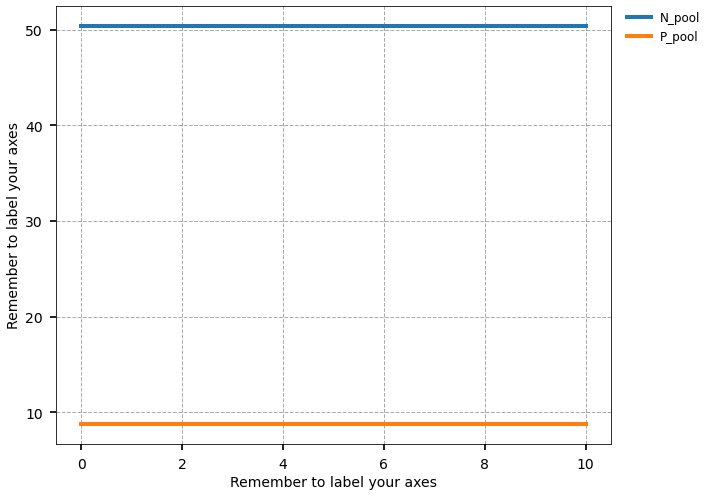

In [21]:
s_poolman_split.plot_selection(["N_pool", "P_pool"])

### Simulation

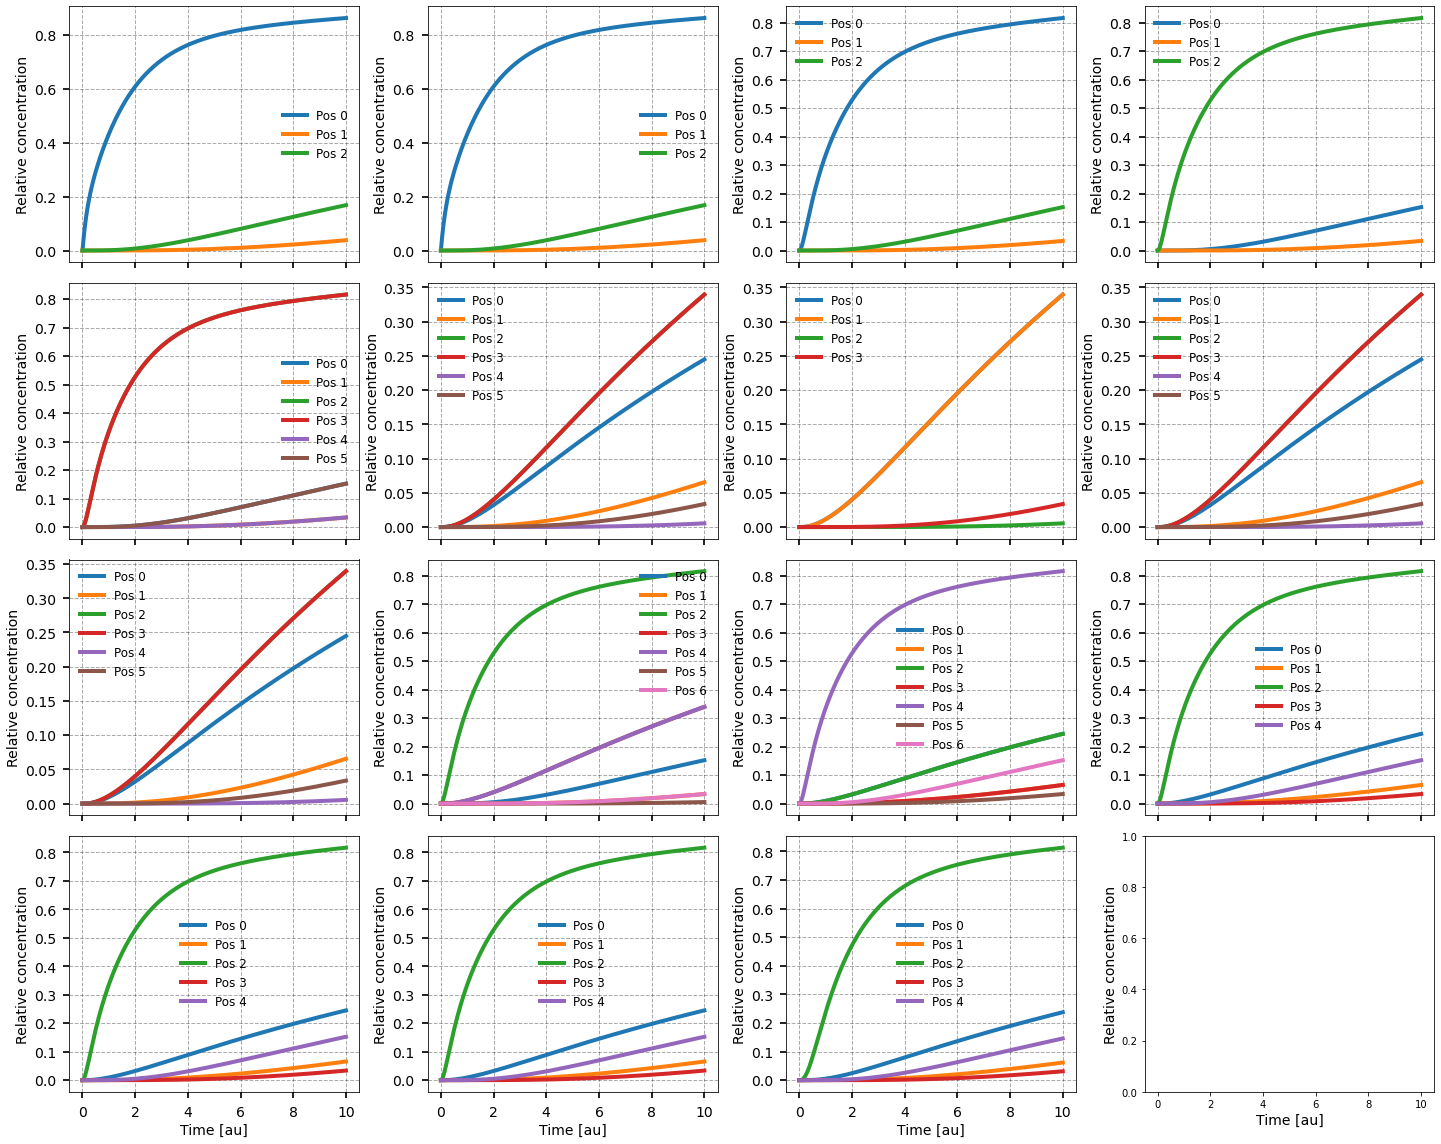

In [22]:
fig, ax = s_poolman_split.plot_all_label_distributions(
    ncols=4, sharey=False, relative=True, xlabels="Time [au]",
)

## Label Model

In [23]:
m_poolman = LabelModel(parameters=parameters)
m_poolman.add_compound("ATP")
m_poolman.add_label_compounds(
    {
        "PGA": 3,
        "BPGA": 3,
        "GAP": 3,
        "DHAP": 3,
        "FBP": 6,
        "F6P": 6,
        "E4P": 4,
        "G6P": 6,
        "G1P": 6,
        "SBP": 7,
        "S7P": 7,
        "X5P": 5,
        "R5P": 5,
        "RU5P": 5,
        "RUBP": 5,
    }
)

### Algebraic modules

In [24]:
m_poolman.add_algebraic_module(
    module_name="ADP_module",
    function=ADP,
    compounds=["ATP"],
    derived_compounds=["ADP"],
    parameters=["AP_total"],
)


m_poolman.add_algebraic_module(
    module_name="Phosphate_module",
    function=P_i,
    compounds=[
        "PGA__total",
        "BPGA__total",
        "GAP__total",
        "DHAP__total",
        "FBP__total",
        "F6P__total",
        "G6P__total",
        "G1P__total",
        "SBP__total",
        "S7P__total",
        "E4P__total",
        "X5P__total",
        "R5P__total",
        "RUBP__total",
        "RU5P__total",
        "ATP",
    ],
    derived_compounds=["P_pool"],
    parameters=["Phosphate_total"],
)


m_poolman.add_algebraic_module(
    module_name="N_module",
    function=N,
    compounds=[
        "P_pool",
        "PGA__total",
        "GAP__total",
        "DHAP__total",
    ],
    derived_compounds=["N_pool"],
    parameters=[
        "K_pxt",
        "P_pool_ext",
        "K_pi",
        "K_pga",
        "K_gap",
        "K_dhap",
    ],
)

### Rapid equilibrium reactions

In [25]:
m_poolman.add_labelmap_reaction(
    rate_name="v2",
    function=rapid_equilibrium_2_2,
    stoichiometry={"PGA": -1, "ATP": -1, "BPGA": 1},
    labelmap=labelmaps["v2"],
    modifiers=["ADP"],
    parameters=["k_rapid_eq", "q2"],
    reversible=True,
)
m_poolman.add_labelmap_reaction(
    rate_name="v3",
    function=v3,
    stoichiometry={"BPGA": -1, "GAP": 1},
    labelmap=labelmaps["v3"],
    modifiers=["P_pool"],
    parameters=[
        "proton_pool_stroma",
        "NADPH_pool",
        "NADP_pool",
        "k_rapid_eq",
        "q3",
    ],
    reversible=True,
)
m_poolman.add_labelmap_reaction(
    rate_name="v4",
    function=rapid_equilibrium_1_1,
    stoichiometry={"GAP": -1, "DHAP": 1},
    labelmap=labelmaps["v4"],
    parameters=["k_rapid_eq", "q4"],
    reversible=True,
)
m_poolman.add_labelmap_reaction(
    rate_name="v5",
    function=rapid_equilibrium_2_1,
    stoichiometry={"DHAP": -1, "GAP": -1, "FBP": 1},
    labelmap=labelmaps["v5"],
    parameters=["k_rapid_eq", "q5"],
    reversible=True,
)
m_poolman.add_labelmap_reaction(
    rate_name="v7",
    function=rapid_equilibrium_2_2,
    stoichiometry={"F6P": -1, "GAP": -1, "X5P": 1, "E4P": 1},
    labelmap=labelmaps["v7"],
    parameters=["k_rapid_eq", "q7"],
    reversible=True,
)
m_poolman.add_labelmap_reaction(
    rate_name="v8",
    function=rapid_equilibrium_2_1,
    stoichiometry={"DHAP": -1, "E4P": -1, "SBP": 1},
    labelmap=labelmaps["v8"],
    parameters=["k_rapid_eq", "q8"],
    reversible=True,
)
m_poolman.add_labelmap_reaction(
    rate_name="v10",
    function=rapid_equilibrium_2_2,
    stoichiometry={"S7P": -1, "GAP": -1, "X5P": 1, "R5P": 1},
    labelmap=labelmaps["v10"],
    parameters=["k_rapid_eq", "q10"],
    reversible=True,
)
m_poolman.add_labelmap_reaction(
    rate_name="v11",
    function=rapid_equilibrium_1_1,
    stoichiometry={"R5P": -1, "RU5P": 1},
    labelmap=labelmaps["v11"],
    parameters=["k_rapid_eq", "q11"],
    reversible=True,
)
m_poolman.add_labelmap_reaction(
    rate_name="v12",
    function=rapid_equilibrium_1_1,
    stoichiometry={"X5P": -1, "RU5P": 1},
    labelmap=labelmaps["v12"],
    parameters=["k_rapid_eq", "q12"],
    reversible=True,
)
m_poolman.add_labelmap_reaction(
    rate_name="v14",
    function=rapid_equilibrium_1_1,
    stoichiometry={"F6P": -1, "G6P": 1},
    labelmap=labelmaps["v14"],
    parameters=["k_rapid_eq", "q14"],
    reversible=True,
)
m_poolman.add_labelmap_reaction(
    rate_name="v15",
    function=rapid_equilibrium_1_1,
    stoichiometry={"G6P": -1, "G1P": 1},
    labelmap=labelmaps["v15"],
    parameters=["k_rapid_eq", "q15"],
    reversible=True,
)

### Reactions

In [26]:
m_poolman.add_labelmap_reaction(
    rate_name="v1",
    function=v1_label,
    stoichiometry={"RUBP": -1, "PGA": 2},
    labelmap=labelmaps["v1"],
    modifiers=[
        "RUBP__total",
        "PGA__total",
        "FBP__total",
        "SBP__total",
        "P_pool",
    ],
    parameters=[
        "Vmax_1",
        "Km_1",
        "Ki_1_1",
        "Ki_1_2",
        "Ki_1_3",
        "Ki_1_4",
        "Ki_1_5",
        "NADPH_pool",
    ],
)


m_poolman.add_labelmap_reaction(
    rate_name="v6",
    function=v6_label,
    stoichiometry={"FBP": -1, "F6P": 1},
    labelmap=labelmaps["v6"],
    modifiers=["FBP__total", "F6P__total", "P_pool"],
    parameters=["Vmax_6", "Km_6", "Ki_6_1", "Ki_6_2"],
)


m_poolman.add_labelmap_reaction(
    rate_name="v9",
    function=v9_label,
    stoichiometry={"SBP": -1, "S7P": 1},
    labelmap=labelmaps["v9"],
    modifiers=["SBP__total", "P_pool"],
    parameters=["Vmax_9", "Km_9", "Ki_9"],
)


m_poolman.add_labelmap_reaction(
    rate_name="v13",
    function=v13_label,
    stoichiometry={"RU5P": -1, "ATP": -1, "RUBP": 1},
    labelmap=labelmaps["v13"],
    modifiers=[
        "RU5P__total",
        "PGA__total",
        "RUBP__total",
        "ADP",
        "P_pool",
    ],
    parameters=[
        "Vmax_13",
        "Km_13_1",
        "Km_13_2",
        "Ki_13_1",
        "Ki_13_2",
        "Ki_13_3",
        "Ki_13_4",
        "Ki_13_5",
    ],
)


m_poolman.add_labelmap_reaction(
    rate_name="vSt",
    function=vStarchProduction_label,
    stoichiometry={"G1P": -1, "ATP": -1},
    labelmap=labelmaps["vSt"],
    modifiers=[
        "G1P__total",
        "PGA__total",
        "F6P__total",
        "FBP__total",
        "ADP",
        "P_pool",
    ],
    parameters=[
        "Vmax_starch",
        "Km_starch_1",
        "Km_starch_2",
        "Ki_starch",
        "Ka_starch_1",
        "Ka_starch_2",
        "Ka_starch_3",
    ],
)


m_poolman.add_labelmap_reaction(
    rate_name="vPGA_out",
    function=v_out,
    stoichiometry={"PGA": -1},
    labelmap=labelmaps["vPGA_out"],
    modifiers=["N_pool"],
    parameters=["Vmax_efflux", "K_pga"],
)
m_poolman.add_labelmap_reaction(
    rate_name="vGAP_out",
    function=v_out,
    stoichiometry={"GAP": -1},
    labelmap=labelmaps["vGAP_out"],
    modifiers=["N_pool"],
    parameters=["Vmax_efflux", "K_gap"],
)
m_poolman.add_labelmap_reaction(
    rate_name="vDHAP_out",
    function=v_out,
    stoichiometry={"DHAP": -1},
    labelmap=labelmaps["vDHAP_out"],
    modifiers=["N_pool"],
    parameters=["Vmax_efflux", "K_dhap"],
)

### Non-label reactions

In [27]:
m_poolman.add_reaction(
    rate_name="v16",
    function=v16,
    stoichiometry={"ATP": 1},
    modifiers=["ADP", "P_pool"],
    parameters=["Vmax_16", "Km_16_1", "Km_16_2"],
)

In [28]:
y0 = m_poolman.generate_y0(poolman_base_y0)
s_poolman = Simulator(m_poolman)
s_poolman.initialise(y0)
t, y = s_poolman.simulate(10)

# fig, ax = s_poolman.plot_label_distribution_grid(
#     compounds=["FBP", "F6P"], relative=True, sharey=False
# )

# s_poolman.plot_derived()

# fig, ax = s_poolman.plot_all_label_distributions(
#     relative=False, sharey=False
# )

In [29]:
s_poolman.plot_selection(
    [
        "N_pool",
        "P_pool",
        "PGA__total",
        "GAP__total",
        "DHAP__total",
    ]
)

(<Figure size 720x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fded4408588>)

In [30]:
m_poolman_split.stoichiometries["v7f__000000001"]

{'F6P__000000': -1, 'GAP__001': -1, 'X5P__00001': 1, 'E4P__0000': 1}

In [31]:
m_poolman.stoichiometries['v7__000000001']

{'F6P__000000': -1, 'GAP__001': -1, 'X5P__00001': 1, 'E4P__0000': 1}

In [32]:
m_poolman_split.stoichiometries["v10f__0000000001"]

{'S7P__0000000': -1, 'GAP__001': -1, 'X5P__00001': 1, 'R5P__00000': 1}

In [33]:
m_poolman.stoichiometries["v10__0000000001"]

{'S7P__0000000': -1, 'GAP__001': -1, 'X5P__00001': 1, 'R5P__00000': 1}

### Simulation

In [34]:
fig, ax = s_poolman.plot_all_label_distributions(
    ncols=4, sharey=False, relative=True, xlabels="Time [au]",
)

# Mass-action model

## Base Model

In [35]:
m_bassham_base = m_poolman_base.copy()
m_bassham_base.remove_parameters(
    [
        "q2",
        "q3",
        "q4",
        "q5",
        "q7",
        "q8",
        "q10",
        "q11",
        "q12",
        "q14",
        "q15",
        "Vmax_efflux",
        "k_rapid_eq",
    ]
)
m_bassham_base.add_parameters(
    {
        "k2f": 9.201751269188145,
        "k2r": 32582.211592466298,
        "k3f": 544637974.9812177,
        "k3r": 6.770073507981515e-05,
        "k4f": 71.12668763739163,
        "k4r": 2.536954631987327,
        "k5f": 26.59188391761439,
        "k5r": 2.857113867555865,
        "k7f": 19.397240851045034,
        "k7r": 171.32156056378304,
        "k8f": 70.05167257677905,
        "k8r": 5.610915648763027,
        "k10f": 35.747464921294416,
        "k10r": 37.35248352641369,
        "k11f": 48.64771237135582,
        "k11r": 116.41666392881288,
        "k12f": 157.52592237170072,
        "k12r": 232.8333228289382,
        "k14f": 0.049555583505605835,
        "k14r": 0.021677578735797107,
        "k15f": 0.014301375975283213,
        "k15r": 1.3767755716272655e-10,
    }
)
m_bassham_base.add_parameters(
    {
        "Vmax_efflux_PGA": 1.1066699104291686,
        "Vmax_efflux_GAP": 0.8479624058609916,
        "Vmax_efflux_DHAP": 0.9327585789768257,
    }
)
m_bassham_base.update_parameters(
    {
        "Vmax_1": 1.1470205806062528,
        "Vmax_6": 0.4549249003859781,
        "Vmax_9": 0.30125280912820146,
        "Vmax_13": 24.755929769008766,
        "Vmax_16": 2.6270790430755477,
        "Vmax_starch": 0.1223590855373052,
    }
)


m_bassham_base.update_reaction(
    rate_name="v2",
    function=rev_mass_action_2_2,
    parameters=["k2f", "k2r"],
)

m_bassham_base.update_reaction(
    rate_name="v3",
    function=v3_mass_action,
    parameters=[
        "proton_pool_stroma",
        "NADPH_pool",
        "NADP_pool",
        "k3f",
        "k3r",
    ],
)
m_bassham_base.update_reaction(
    rate_name="v4",
    function=rev_mass_action_1_1,
    parameters=["k4f", "k4r"],
)
m_bassham_base.update_reaction(
    rate_name="v5",
    function=rev_mass_action_2_1,
    parameters=["k5f", "k5r"],
)
m_bassham_base.update_reaction(
    rate_name="v7",
    function=rev_mass_action_2_2,
    parameters=["k7f", "k7r"],
)
m_bassham_base.update_reaction(
    rate_name="v8",
    function=rev_mass_action_2_1,
    parameters=["k8f", "k8r"],
)
m_bassham_base.update_reaction(
    rate_name="v10",
    function=rev_mass_action_2_2,
    parameters=["k10f", "k10r"],
)
m_bassham_base.update_reaction(
    rate_name="v11",
    function=rev_mass_action_1_1,
    parameters=["k11f", "k11r"],
)
m_bassham_base.update_reaction(
    rate_name="v12",
    function=rev_mass_action_1_1,
    parameters=["k12f", "k12r"],
)
m_bassham_base.update_reaction(
    rate_name="v14",
    function=rev_mass_action_1_1,
    parameters=["k14f", "k14r"],
)
m_bassham_base.update_reaction(
    rate_name="v15",
    function=rev_mass_action_1_1,
    parameters=["k15f", "k15r"],
)
m_bassham_base.update_reaction(
    rate_name="vPGA_out",
    function=v_out,
    modifiers=["N_pool"],
    parameters=["Vmax_efflux_PGA", "K_pga"],
)
m_bassham_base.update_reaction(
    rate_name="vGAP_out",
    function=v_out,
    modifiers=["N_pool"],
    parameters=["Vmax_efflux_GAP", "K_gap"],
)
m_bassham_base.update_reaction(
    rate_name="vDHAP_out",
    function=v_out,
    modifiers=["N_pool"],
    parameters=["Vmax_efflux_DHAP", "K_dhap"],
)

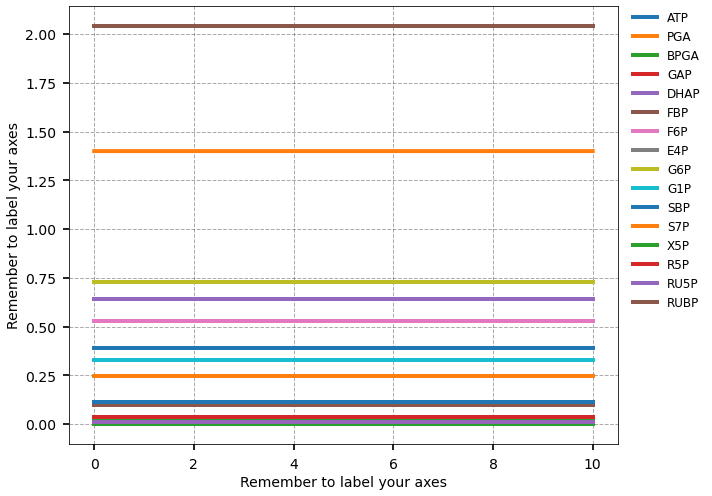

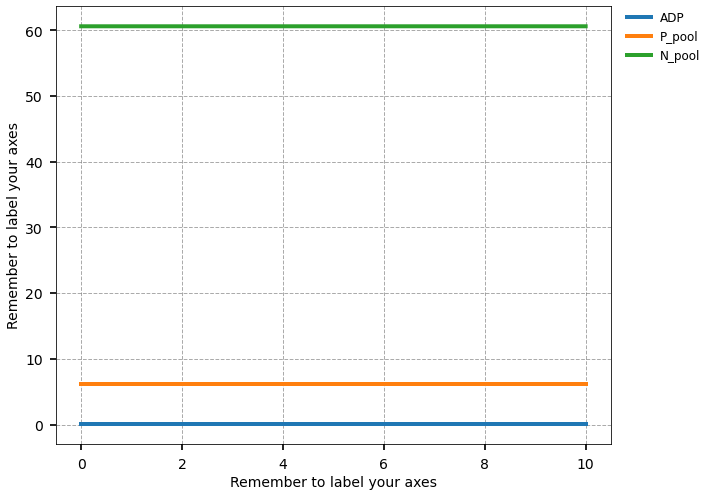

In [36]:
bassham_base_y0 = {
    "PGA": 1.4,
    "BPGA": 0.001,  # Guessed
    "GAP": 0.032,
    "DHAP": 0.64,
    "FBP": 0.097,
    "F6P": 0.53,
    "E4P": 0.02,
    "G6P": 0.73,
    "G1P": 0.33,  # Guessed
    "SBP": 0.114,
    "S7P": 0.248,
    "X5P": 0.021,
    "R5P": 0.034,
    "RUBP": 2.04,
    "RU5P": 0.012,
    "ATP": 0.39,  # Pettersson
}

s_bassham_base = Simulator(m_bassham_base)
s_bassham_base.initialise(bassham_base_y0)
t, y = s_bassham_base.simulate(10)
fig, ax = s_bassham_base.plot()
fig, ax = s_bassham_base.plot_derived()

## Label Model

In [37]:
m_bassham = m_poolman.copy()


def rev_mass_action_1_1(s1, p1, kf, kr):
    return kf * s1 - kr * p1


def rev_mass_action_2_1(s1, s2, p1, kf, kr):
    return kf * s1 * s2 - kr * p1


def rev_mass_action_2_2(s1, s2, p1, p2, kf, kr):
    return kf * s1 * s2 - kr * p1 * p2


def v3_mass_action(
    BPGA,
    GAP,
    phosphate_pool,
    proton_pool_stroma,
    NADPH_pool,
    NADP_pool,
    kf,
    kr,
):
    return (
        kf * NADPH_pool * BPGA * proton_pool_stroma
        - kr * GAP * NADP_pool * phosphate_pool
    )


m_bassham.remove_parameters(
    [
        "q2",
        "q3",
        "q4",
        "q5",
        "q7",
        "q8",
        "q10",
        "q11",
        "q12",
        "q14",
        "q15",
        "Vmax_efflux",
        "k_rapid_eq",
    ]
)
m_bassham.add_parameters(
    {
        "k2f": 9.201751269188145,
        "k2r": 32582.211592466298,
        "k3f": 544637974.9812177,
        "k3r": 6.770073507981515e-05,
        "k4f": 71.12668763739163,
        "k4r": 2.536954631987327,
        "k5f": 26.59188391761439,
        "k5r": 2.857113867555865,
        "k7f": 19.397240851045034,
        "k7r": 171.32156056378304,
        "k8f": 70.05167257677905,
        "k8r": 5.610915648763027,
        "k10f": 35.747464921294416,
        "k10r": 37.35248352641369,
        "k11f": 48.64771237135582,
        "k11r": 116.41666392881288,
        "k12f": 157.52592237170072,
        "k12r": 232.8333228289382,
        "k14f": 0.049555583505605835,
        "k14r": 0.021677578735797107,
        "k15f": 0.014301375975283213,
        "k15r": 1.3767755716272655e-10,
    }
)
m_bassham.add_parameters(
    {
        "Vmax_efflux_PGA": 1.1066699104291686,
        "Vmax_efflux_GAP": 0.8479624058609916,
        "Vmax_efflux_DHAP": 0.9327585789768257,
    }
)
m_bassham.update_parameters(
    {
        "Vmax_1": 1.1470205806062528,
        "Vmax_6": 0.4549249003859781,
        "Vmax_9": 0.30125280912820146,
        "Vmax_13": 24.755929769008766,
        "Vmax_16": 2.6270790430755477,
        "Vmax_starch": 0.1223590855373052,
    }
)


m_bassham.update_labelmap_reaction(
    rate_name="v2",
    function=rev_mass_action_2_2,
    parameters=["k2f", "k2r"],
)

m_bassham.update_labelmap_reaction(
    rate_name="v3",
    function=v3_mass_action,
    parameters=[
        "proton_pool_stroma",
        "NADPH_pool",
        "NADP_pool",
        "k3f",
        "k3r",
    ],
)
m_bassham.update_labelmap_reaction(
    rate_name="v4",
    function=rev_mass_action_1_1,
    parameters=["k4f", "k4r"],
)
m_bassham.update_labelmap_reaction(
    rate_name="v5",
    function=rev_mass_action_2_1,
    parameters=["k5f", "k5r"],
)
m_bassham.update_labelmap_reaction(
    rate_name="v7",
    function=rev_mass_action_2_2,
    parameters=["k7f", "k7r"],
)
m_bassham.update_labelmap_reaction(
    rate_name="v8",
    function=rev_mass_action_2_1,
    parameters=["k8f", "k8r"],
)
m_bassham.update_labelmap_reaction(
    rate_name="v10",
    function=rev_mass_action_2_2,
    parameters=["k10f", "k10r"],
)
m_bassham.update_labelmap_reaction(
    rate_name="v11",
    function=rev_mass_action_1_1,
    parameters=["k11f", "k11r"],
)
m_bassham.update_labelmap_reaction(
    rate_name="v12",
    function=rev_mass_action_1_1,
    parameters=["k12f", "k12r"],
)
m_bassham.update_labelmap_reaction(
    rate_name="v14",
    function=rev_mass_action_1_1,
    parameters=["k14f", "k14r"],
)
m_bassham.update_labelmap_reaction(
    rate_name="v15",
    function=rev_mass_action_1_1,
    parameters=["k15f", "k15r"],
)
m_bassham.update_labelmap_reaction(
    rate_name="vPGA_out",
    function=v_out,
    modifiers=["N_pool"],
    parameters=["Vmax_efflux_PGA", "K_pga"],
)
m_bassham.update_labelmap_reaction(
    rate_name="vGAP_out",
    function=v_out,
    modifiers=["N_pool"],
    parameters=["Vmax_efflux_GAP", "K_gap"],
)
m_bassham.update_labelmap_reaction(
    rate_name="vDHAP_out",
    function=v_out,
    modifiers=["N_pool"],
    parameters=["Vmax_efflux_DHAP", "K_dhap"],
)

In [38]:
y0 = m_bassham.generate_y0(bassham_base_y0)
s_bassham = Simulator(m_bassham)
s_bassham.initialise(y0)
t, y = s_bassham.simulate(10)

(<Figure size 720x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdec5f34710>)

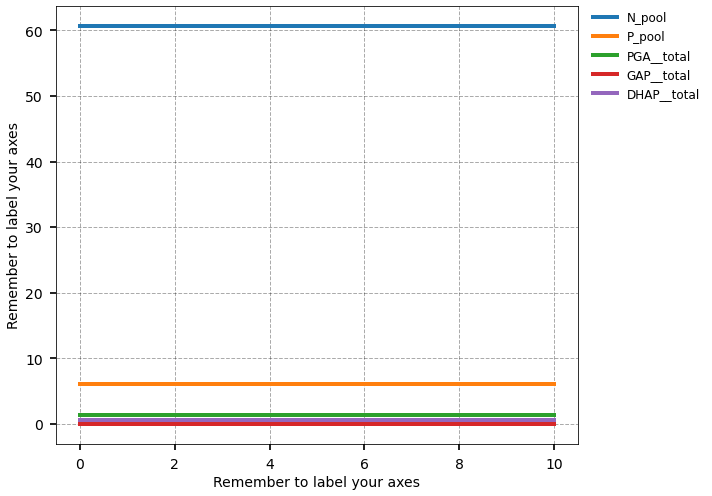

In [39]:
s_bassham.plot_selection(
    [
        "N_pool",
        "P_pool",
        "PGA__total",
        "GAP__total",
        "DHAP__total",
    ]
)

### Simulation

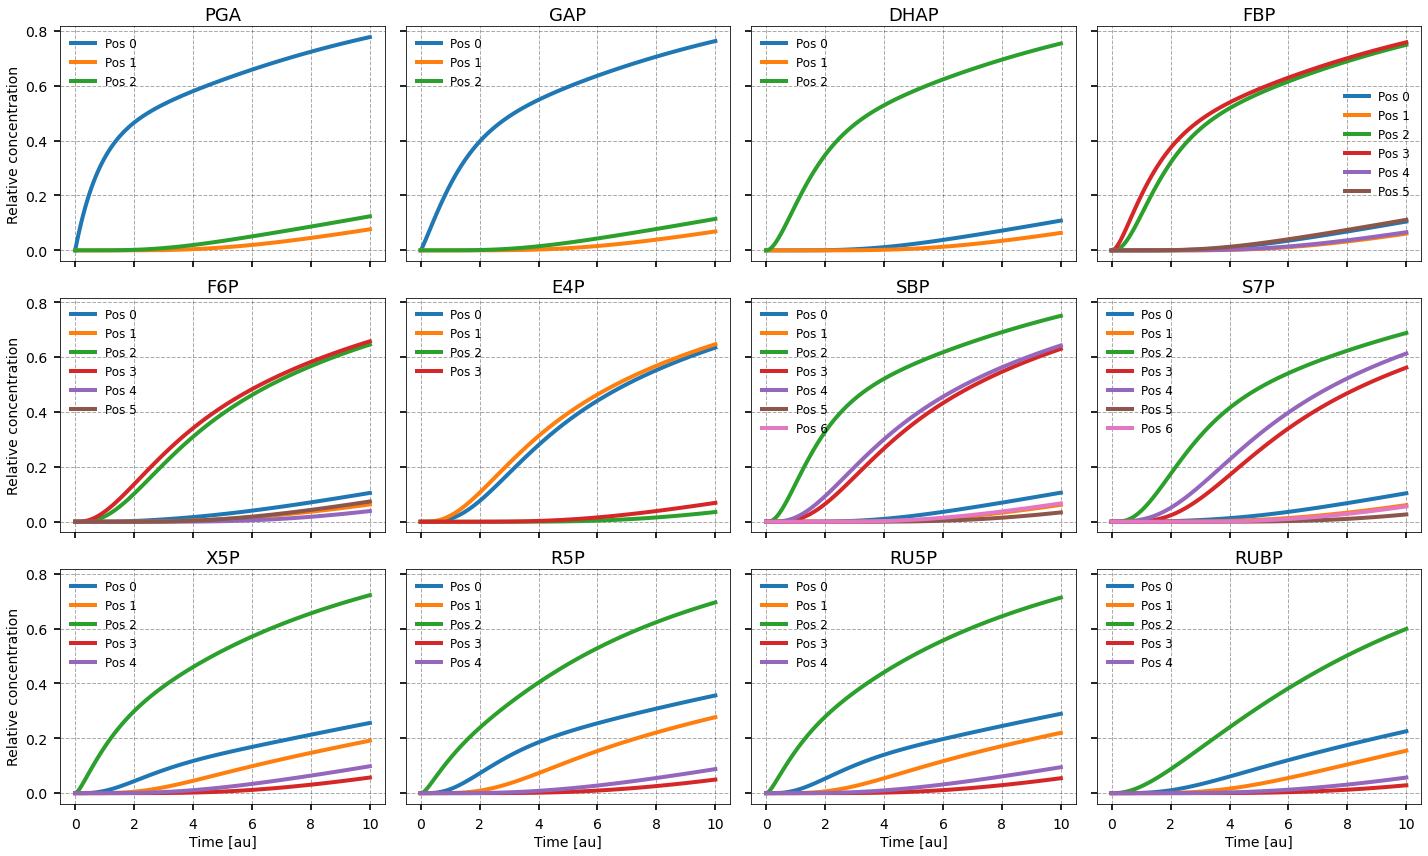

In [40]:
fig, ax = s_bassham.plot_label_distribution_grid(
    compounds=[
        "PGA",
        "GAP",
        "DHAP",
        "FBP",
        "F6P",
        "E4P",
        "SBP",
        "S7P",
        "X5P",
        "R5P",
        "RU5P",
        "RUBP",
    ],
    ncols=4,
    sharey=True,
    relative=True,
    xlabels="Time [au]",
)